In [1]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

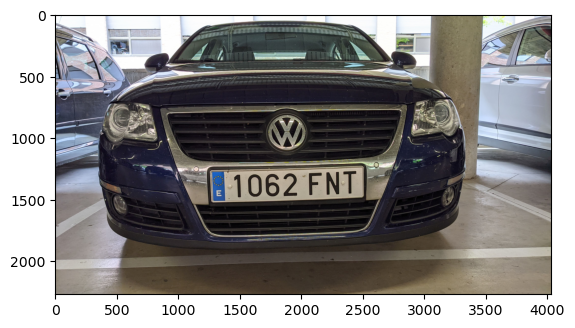

In [4]:
img = cv2.imread('/media/eric/D/repos/ANPR-GIA/Test/Frontal/Frontal/1062FNT.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# GRAY

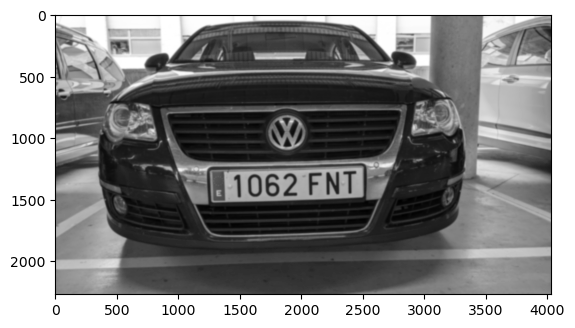

In [53]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (31, 31), 0)
plt.imshow(gray, cmap='gray')

# BLACKHAT

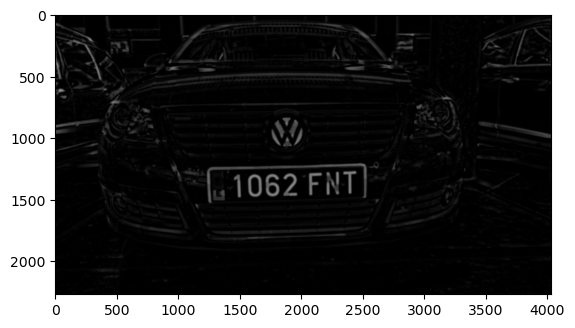

In [56]:
structuring_element = np.zeros((40, 40), np.uint8)
structuring_element[1:-1, 1:-1] = 1
black_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuring_element)
plt.imshow(black_hat, cmap="gray", vmin=0, vmax=255)

# OPEN

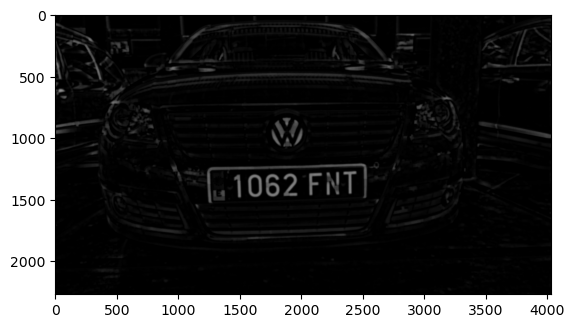

In [70]:
# open
structuring_element = np.zeros((10, 10), np.uint8)
structuring_element[1:-1, 1:-1] = 1
open = cv2.morphologyEx(black_hat, cv2.MORPH_OPEN, structuring_element)
plt.imshow(open, cmap="gray", vmin=0, vmax=255)

In [62]:
open == black_hat

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True]])

# OTSU

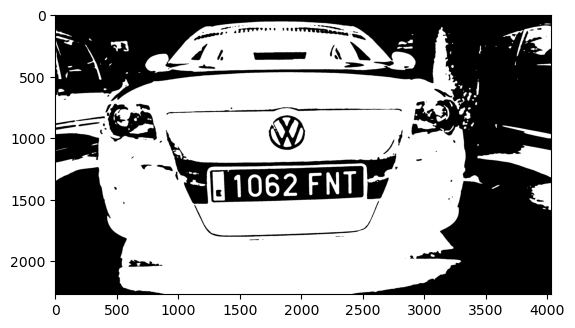

In [67]:
otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(otsu[1], cmap='gray')

# EDGE DETECTION

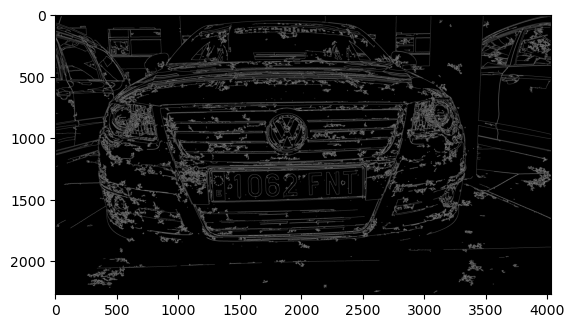

In [38]:
# use canny edge detection
edges = cv2.Canny(gray, 0, 255)
plt.imshow(edges, cmap='gray')

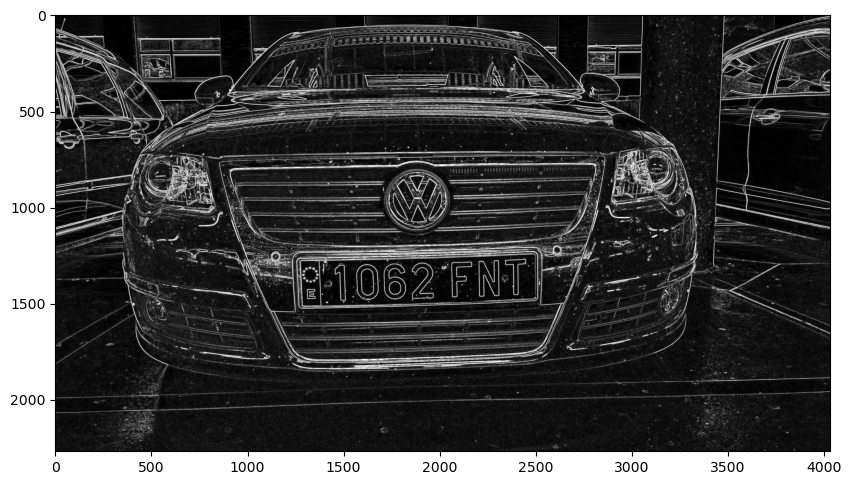

In [47]:
# use sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)
sobel = np.clip(sobel, 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 15))
plt.imshow(sobel, cmap='gray')

# RECTANGLE BLOBS

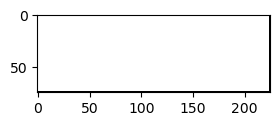

In [74]:
rect_structuring_element = np.zeros((75, 225), np.uint8)
rect_structuring_element[1:-1, 1:-1] = 1
plt.figure(figsize=(3, 5))
plt.imshow(rect_structuring_element, cmap="gray", vmin=0, vmax=1)

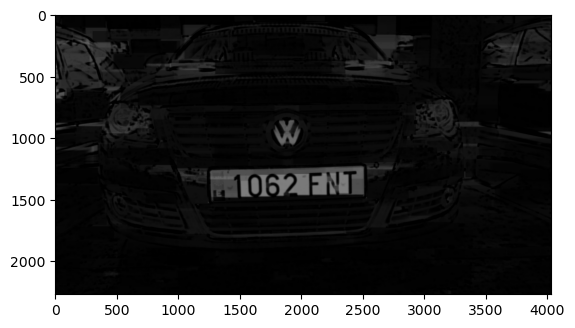

In [75]:
rect_black_hat = cv2.morphologyEx(open, cv2.MORPH_BLACKHAT, rect_structuring_element)
plt.imshow(rect_black_hat, cmap="gray", vmin=0, vmax=255)

In [ ]:
# mirar esto tambien
cv2.findContours

---

  0%|          | 0/5 [00:00<?, ?it/s]

loading image
converting to gray
black hat
open
rect black hat


 20%|██        | 1/5 [00:02<00:09,  2.31s/it]

binarizing
loading image
converting to gray
black hat
open
rect black hat


 40%|████      | 2/5 [00:04<00:06,  2.24s/it]

binarizing
loading image
converting to gray
black hat
open
rect black hat


 60%|██████    | 3/5 [00:06<00:04,  2.25s/it]

binarizing
loading image
converting to gray
black hat
open
rect black hat


 80%|████████  | 4/5 [00:09<00:02,  2.34s/it]

binarizing
loading image
converting to gray
black hat
open
rect black hat


100%|██████████| 5/5 [00:11<00:00,  2.35s/it]

binarizing


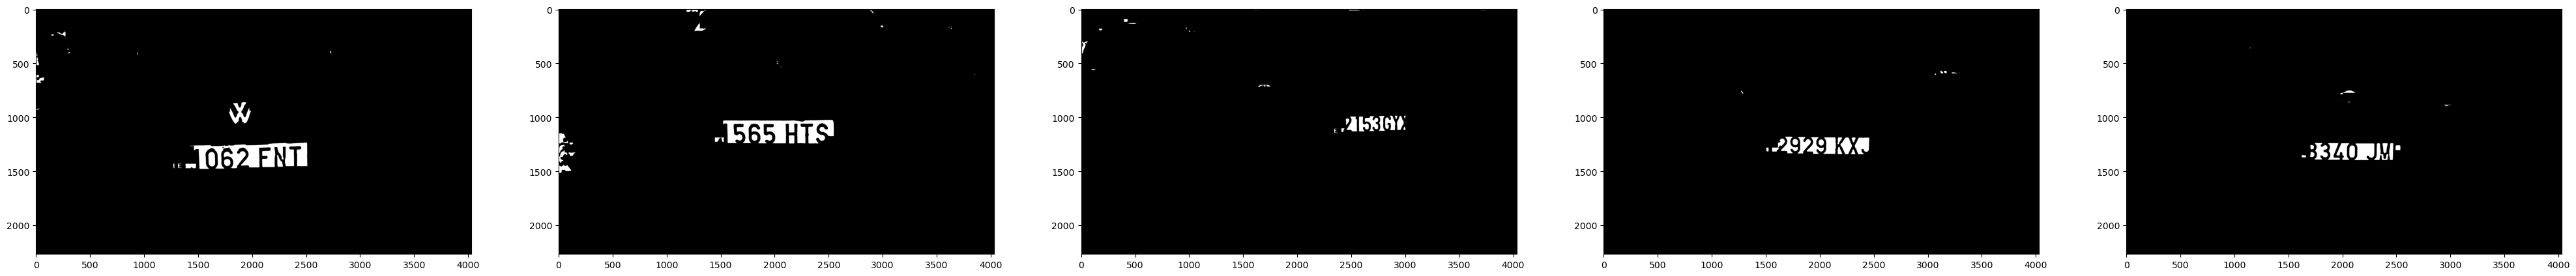

In [64]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# list images
path = '/media/eric/D/repos/ANPR-GIA/Test/Frontal/Frontal/'
n = 5
images = os.listdir(path)[:n]
images = [path + img for img in images]

results = []
for img in tqdm(images):
	print("loading image")
	img = cv2.imread(img)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

	# gray
	print("converting to gray")
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (31, 31), 0)

	# black hat
	print("black hat")
	structuring_element = np.zeros((40, 40), np.uint8)
	structuring_element[1:-1, 1:-1] = 1
	black_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuring_element)

	# open
	print("open")
	structuring_element = np.zeros((10, 10), np.uint8)
	structuring_element[1:-1, 1:-1] = 1
	open = cv2.morphologyEx(black_hat, cv2.MORPH_OPEN, structuring_element)
	
	print("rect black hat")
	rect_structuring_element = np.zeros((60, 200), np.uint8)
	# rect_structuring_element = np.zeros((30, 90), np.uint8)
	rect_structuring_element[1:-1, 1:-1] = 1

	rect_black_hat = cv2.morphologyEx(open, cv2.MORPH_BLACKHAT, rect_structuring_element)

	print("binarizing")
	_, binarized = cv2.threshold(rect_black_hat, 70, 255, cv2.THRESH_BINARY)

	results.append(binarized)

fig, ax = plt.subplots(1, n, figsize=(10*n, 10))
for i in range(n):
	ax[i].imshow(results[i], cmap='gray')
plt.show()


---

In [1]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# list images
path = "/media/eric/D/repos/ANPR-GIA/Test/Lateral/Lateral/"
images = [path+img for img in os.listdir(path) if img.endswith(".jpg")]
path2 = "/media/eric/D/repos/ANPR-GIA/images/"
images.extend([path2+img for img in os.listdir(path2) if img.endswith(".jpg") or img.endswith(".jpeg")])
n = len(images)
images = images[:n]

def resize_and_pad(img, target_size=(1280, 720)):
	target_w, target_h = target_size
	h, w = img.shape[:2]
	
	# Calculate the aspect ratio
	aspect_ratio_original = w / h
	aspect_ratio_target = target_w / target_h
	
	# Resize while maintaining aspect ratio
	if aspect_ratio_original > aspect_ratio_target:
		# Image is wider than target, resize based on width
		new_w = target_w
		new_h = int(new_w / aspect_ratio_original)
	else:
		# Image is taller or proportional, resize based on height
		new_h = target_h
		new_w = int(new_h * aspect_ratio_original)
	
	resized_img = cv2.resize(img, (new_w, new_h))
	
	# Padding calculations
	top_pad = (target_h - new_h) // 2
	bottom_pad = target_h - new_h - top_pad
	left_pad = (target_w - new_w) // 2
	right_pad = target_w - new_w - left_pad
	
	# Apply padding using cv2.copyMakeBorder
	padded_img = cv2.copyMakeBorder(
		resized_img, top_pad, bottom_pad, left_pad, right_pad, 
		cv2.BORDER_CONSTANT, value=(0, 0, 0)  # Padding with black
	)
	
	return padded_img

results = []
originals = []
for img_name in (images):
	# print("loading image")
	img = cv2.imread(img_name)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	originals.append(img)

	# make image of fixed size (small for speed)
	# print("resizing")
	img = resize_and_pad(img, target_size=(1280, 720))

	# gray
	# print("converting to gray")
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	g = (int(3), int(3))
	if g[0] % 2 == 0:
		g = (g[0]+1, g[1]+1)
	gray = cv2.GaussianBlur(gray, g, 0)

	# black hat
	# print("black hat")
	structuring_element = np.zeros((int(20), int(20)), np.uint8)
	structuring_element[1:-1, 1:-1] = 1
	black_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuring_element)

	# open
	# print("open")
	structuring_element = np.zeros((int(5), int(5)), np.uint8)
	structuring_element[1:-1, 1:-1] = 1
	open = cv2.morphologyEx(black_hat, cv2.MORPH_OPEN, structuring_element)
	
	# print("rect black hat")
	rect_structuring_element = np.zeros((int(30), int(120)), np.uint8)
	# rect_structuring_element = np.zeros((30, 90), np.uint8)
	rect_structuring_element[1:-1, 1:-1] = 1

	rect_black_hat = cv2.morphologyEx(open, cv2.MORPH_BLACKHAT, rect_structuring_element)

	# print("binarizing")
	_, binarized = cv2.threshold(rect_black_hat, 70, 255, cv2.THRESH_BINARY)

	results.append(binarized)

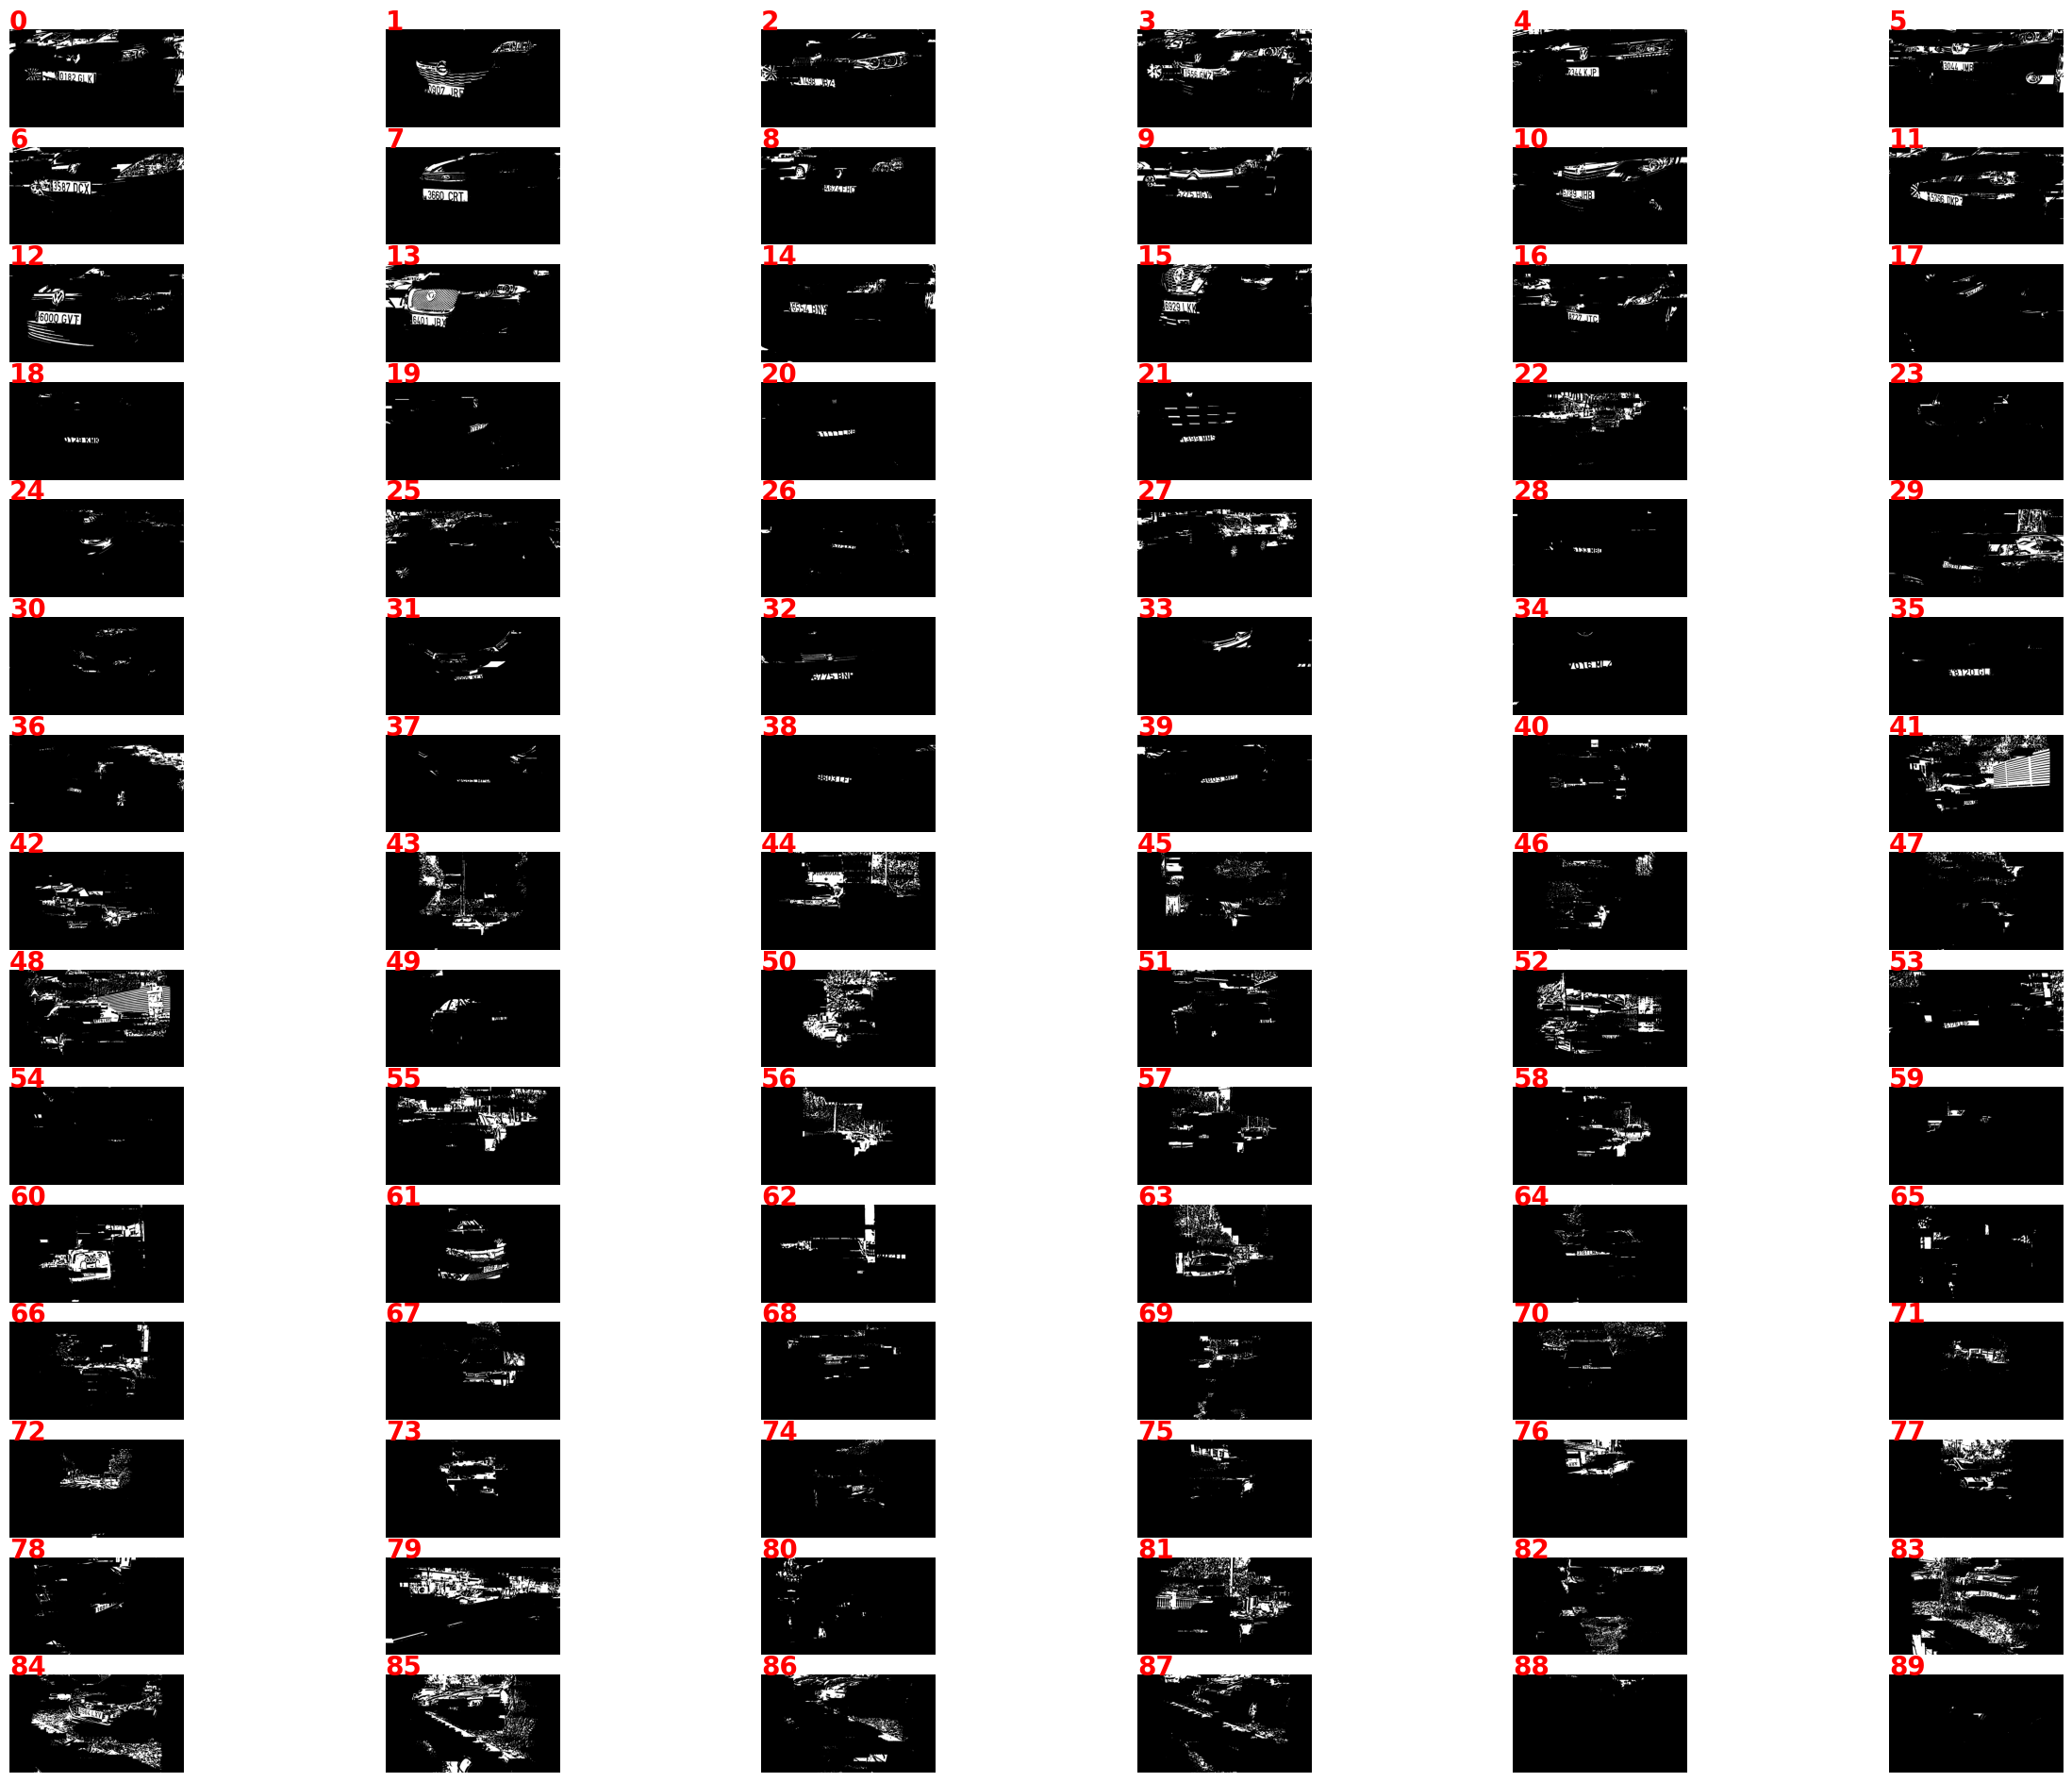

In [2]:
rows = 15
fig, axs = plt.subplots(rows, n//rows, figsize=(30, n//rows*4))
res_images = results[::-1]
for i, ax in enumerate(axs.flatten()):
	ax.axis('off')
	ax.imshow(res_images.pop(), cmap='gray')
	# draw i above the image
	ax.text(0, 0, str(i), color='red', fontsize=20, fontweight='bold')
plt.show()

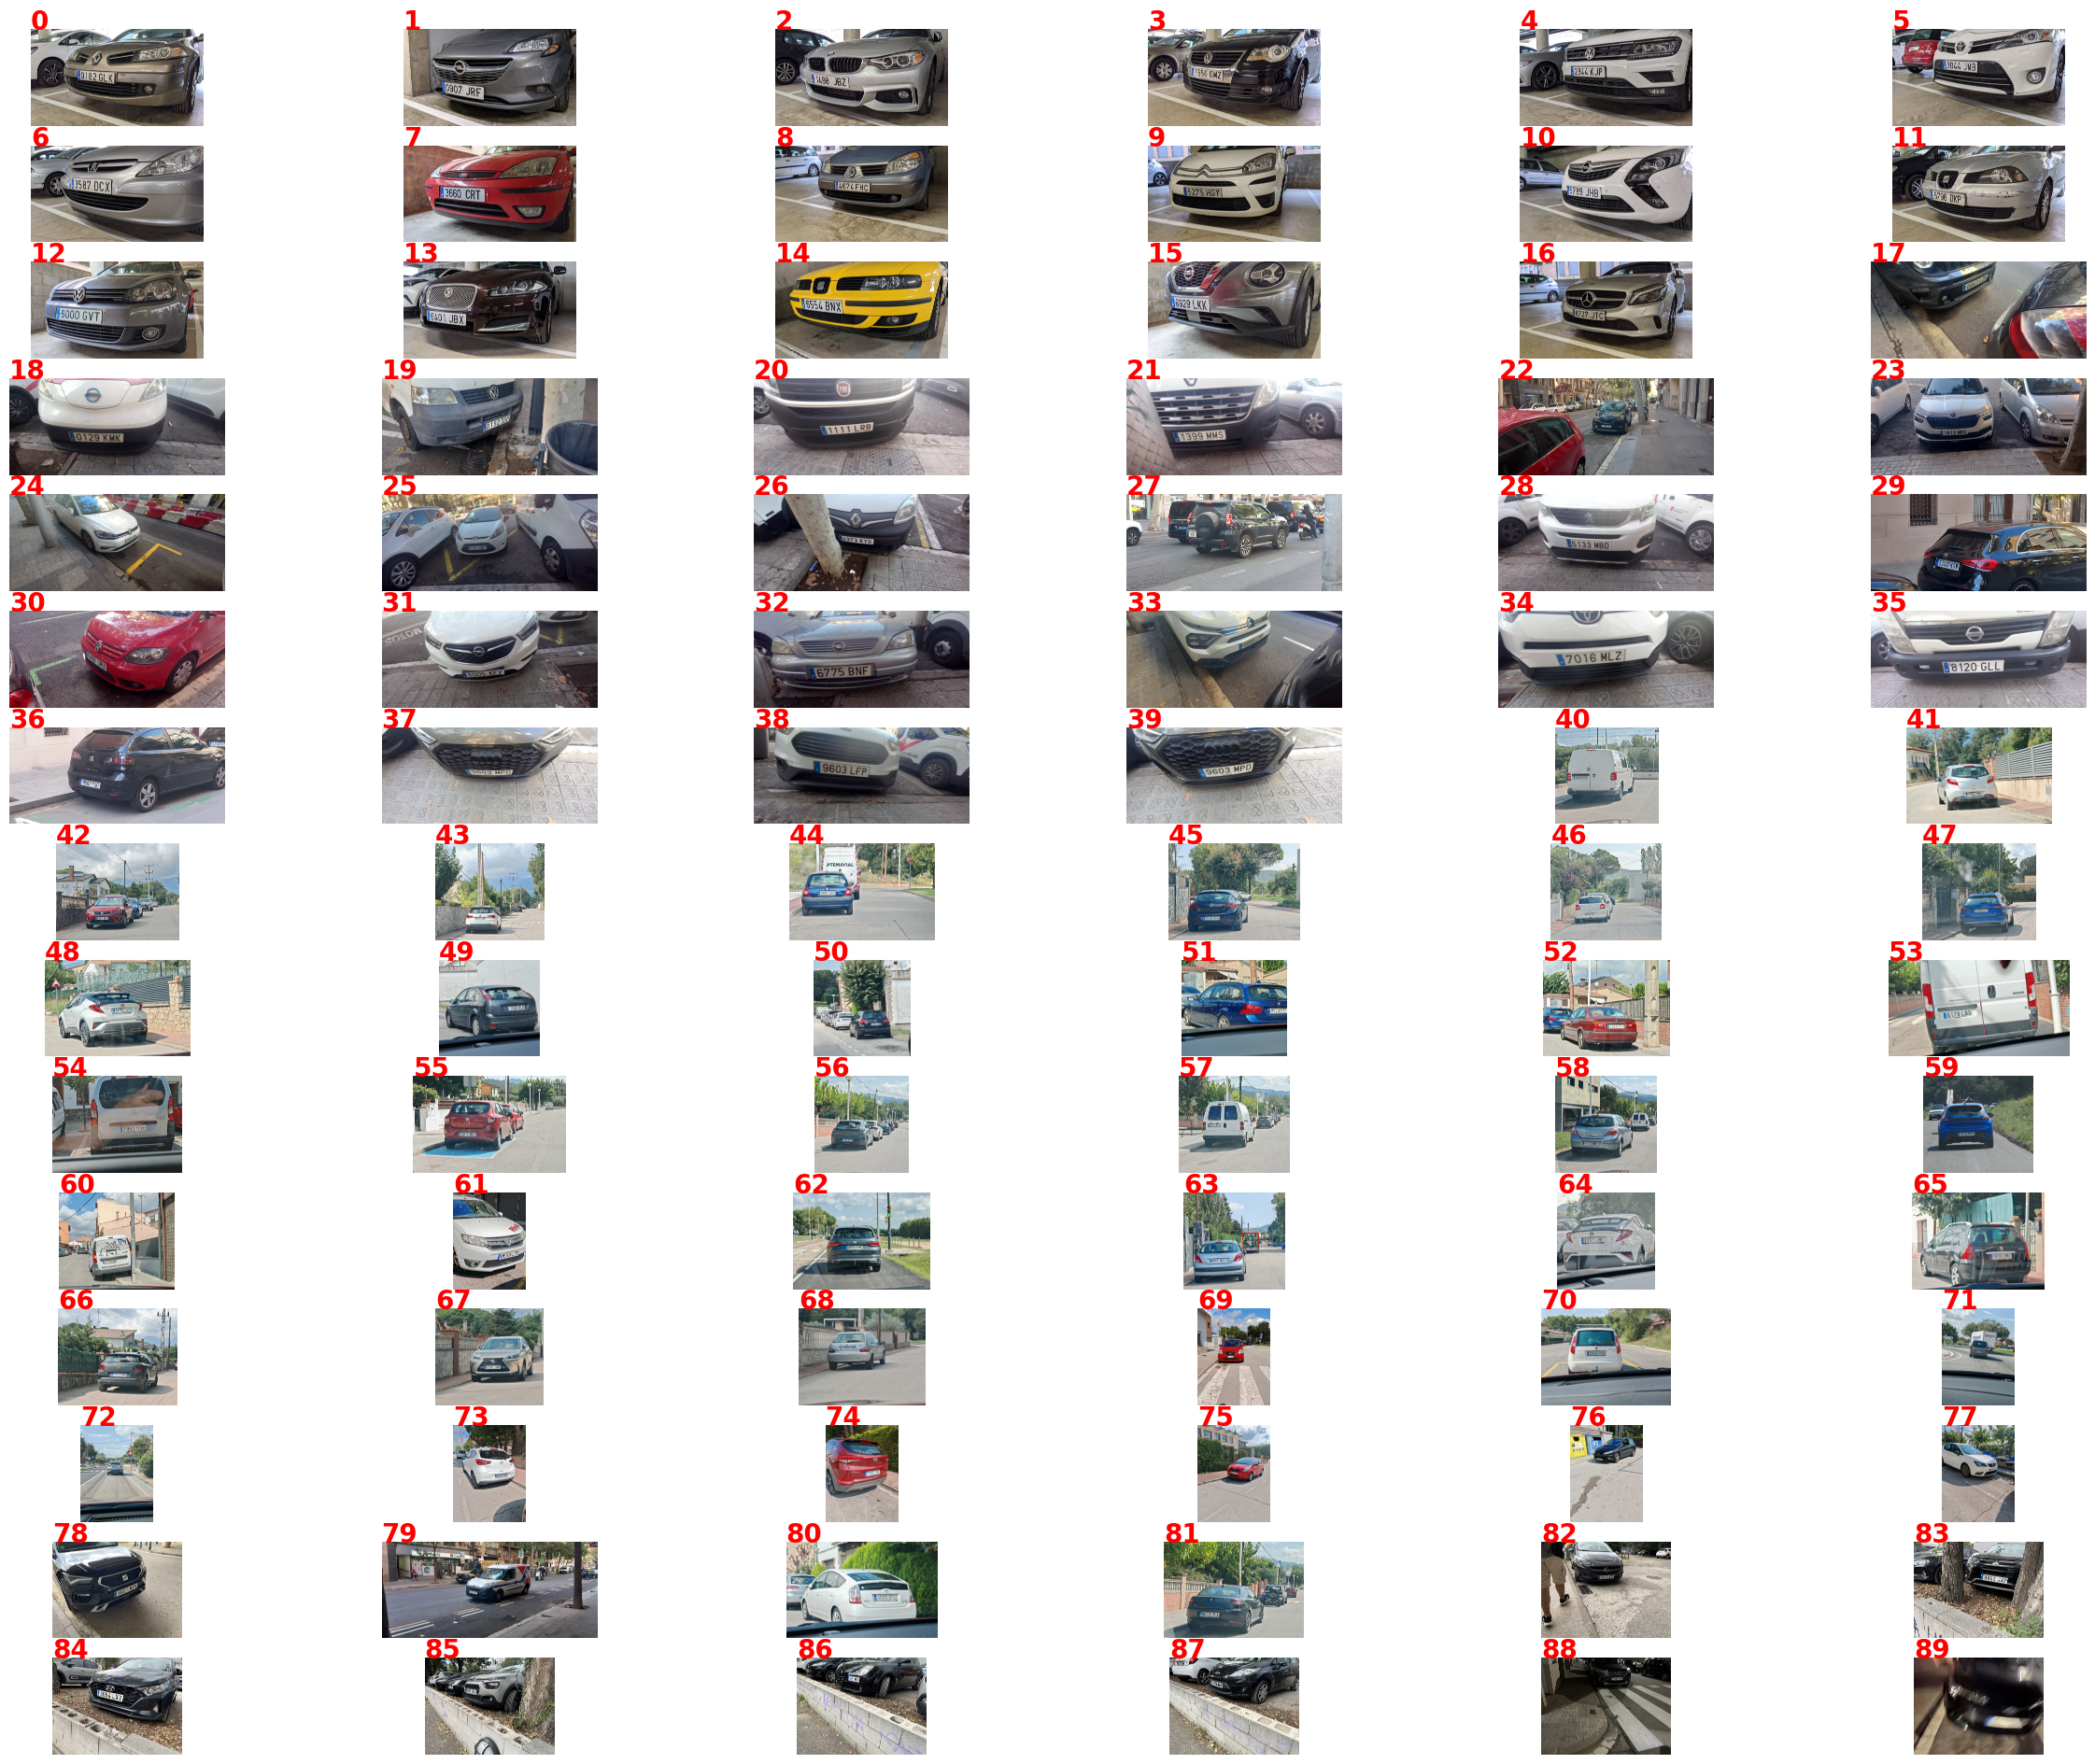

In [3]:
rows = 15
fig, axs = plt.subplots(rows, n//rows, figsize=(30, n//rows*4))
res_images = originals[::-1]
for i, ax in enumerate(axs.flatten()):
	ax.axis('off')
	ax.imshow(res_images.pop(), cmap='gray')
	# draw i above the image
	ax.text(0, 0, str(i), color='red', fontsize=20, fontweight='bold')
plt.show()

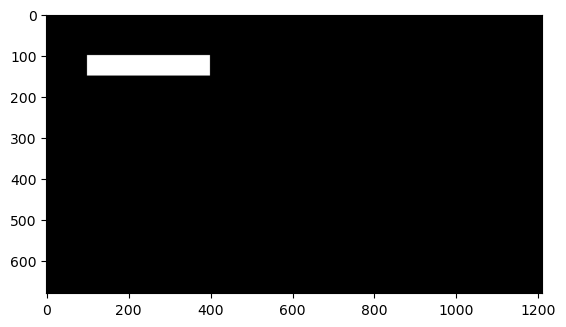

In [27]:
# patch_size = (300, 1500)
patch_size = (50, 300)
patch = np.ones(patch_size)*255

canvas = np.zeros_like(img[:,:,0])
canvas[100:100+patch_size[0], 100:100+patch_size[1]] = patch
plt.imshow(canvas, cmap='gray', vmin=0, vmax=255)

Time: 0.06232428550720215
Time: 0.0018112659454345703


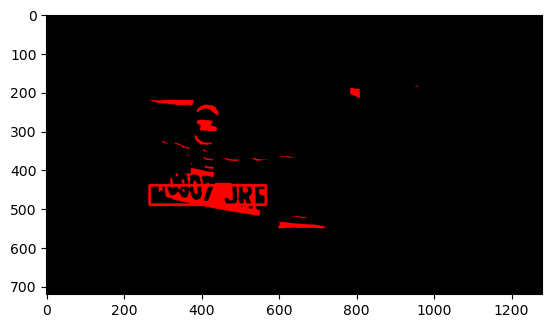

In [129]:
import time

# Usar matchTemplate para comparar el template con la imagen
i = 1
a = np.zeros((*results[i].shape, 3), np.uint8)
a[:,:,0] = results[i]
b = np.zeros((*patch.shape, 3), np.uint8)
b[:,:,0] = patch

start = time.time()
result = cv2.matchTemplate(a, b, cv2.TM_CCORR)
print("Time:", time.time() - start)

# Obtener el punto con mayor valor (mejor coincidencia)
start = time.time()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print("Time:", time.time() - start)

# Dibujar un rectángulo en la región con la mejor coincidencia
top_left = max_loc  # La mejor coincidencia empieza en max_loc
h, w = b.shape[:2]
bottom_right = (top_left[0] + w, top_left[1] + h)

# Dibujar el rectángulo en la imagen original
a = cv2.rectangle(a, top_left, bottom_right, (255, 0, 0), 5)
plt.imshow(a)

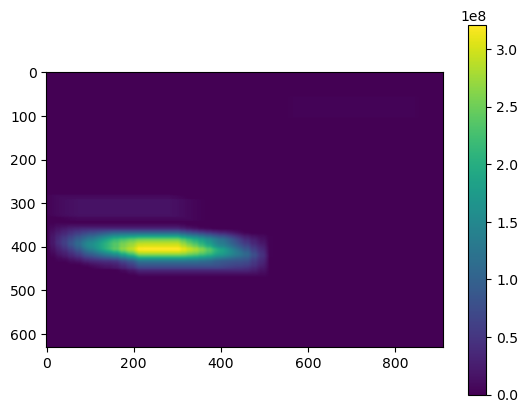

In [29]:
plt.imshow(result)
plt.colorbar()